Import CIFAR-10 dataset :

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
from sklearn.preprocessing import label_binarize

In [124]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [125]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


Examining the data :

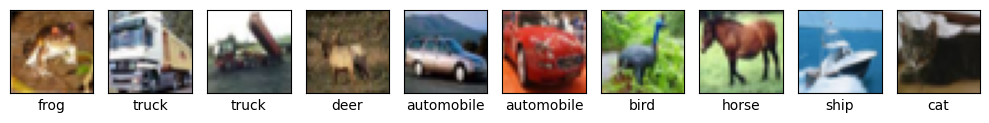

In [126]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot 10 sample images
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.tight_layout()
plt.show()


# Preprocessing :

In [127]:
# Normalization
x_train = x_train / 255.0
x_test = x_test / 255.0

# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(x_train)

# One-hot encoding :
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Building ANN :

In [128]:
# Model :

model = Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(256, activation = 'relu'),
    Dense(128, activation='relu'),
    Dense(10),
])

print (model.summary())

# Loss and Optimiser :

loss = keras.losses.CategoricalCrossentropy(from_logits=True) # for Softmax function
optim = keras.optimizers.Adam(learning_rate=0.0009)
metrics = ['accuracy']

model.compile(loss=loss, optimizer=optim, metrics=metrics)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_21 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 820,874 (3.13 MB)

 Trainable params: 820,874 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

None


Training the model :

In [129]:
batch_size = 64
epoch = 12

history = model.fit(x_train, y_train, batch_size=batch_size,
          epochs=epoch, shuffle = True, verbose = 2, validation_split = 0.2)

Epoch 1/12
625/625 - 4s - 7ms/step - accuracy: 0.3164 - loss: 1.8975 - val_accuracy: 0.3568 - val_loss: 1.7768
Epoch 2/12
625/625 - 2s - 4ms/step - accuracy: 0.3917 - loss: 1.6973 - val_accuracy: 0.3916 - val_loss: 1.6901
Epoch 3/12
625/625 - 2s - 3ms/step - accuracy: 0.4181 - loss: 1.6288 - val_accuracy: 0.4197 - val_loss: 1.6198
Epoch 4/12
625/625 - 2s - 3ms/step - accuracy: 0.4428 - loss: 1.5669 - val_accuracy: 0.4350 - val_loss: 1.5988
Epoch 5/12
625/625 - 3s - 4ms/step - accuracy: 0.4549 - loss: 1.5294 - val_accuracy: 0.4329 - val_loss: 1.5878
Epoch 6/12
625/625 - 3s - 5ms/step - accuracy: 0.4685 - loss: 1.4894 - val_accuracy: 0.4487 - val_loss: 1.5476
Epoch 7/12
625/625 - 3s - 4ms/step - accuracy: 0.4748 - loss: 1.4649 - val_accuracy: 0.4601 - val_loss: 1.5361
Epoch 8/12
625/625 - 2s - 4ms/step - accuracy: 0.4839 - loss: 1.4410 - val_accuracy: 0.4392 - val_loss: 1.5851
Epoch 9/12
625/625 - 2s - 3ms/step - accuracy: 0.4962 - loss: 1.4186 - val_accuracy: 0.4674 - val_loss: 1.5080
E

Testing the model :

In [130]:
model.evaluate(x_test, y_test, batch_size = batch_size, verbose = 2)

157/157 - 0s - 2ms/step - accuracy: 0.4744 - loss: 1.4799


[1.4798598289489746, 0.47440001368522644]

Ploting the training and validation loss curve :

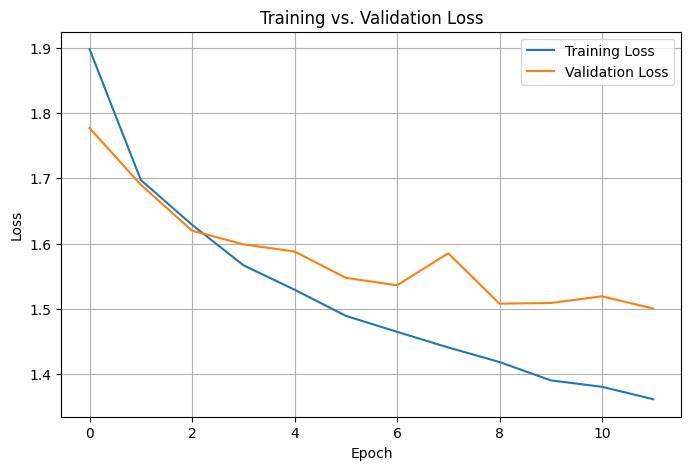

In [131]:
# Extract values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

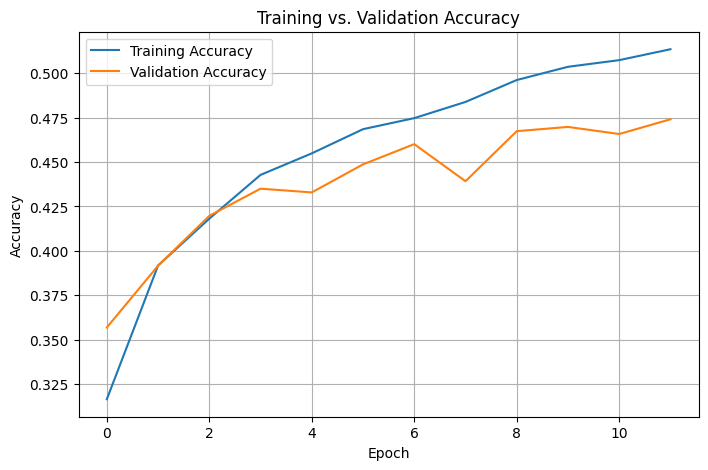

In [132]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(8, 5))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


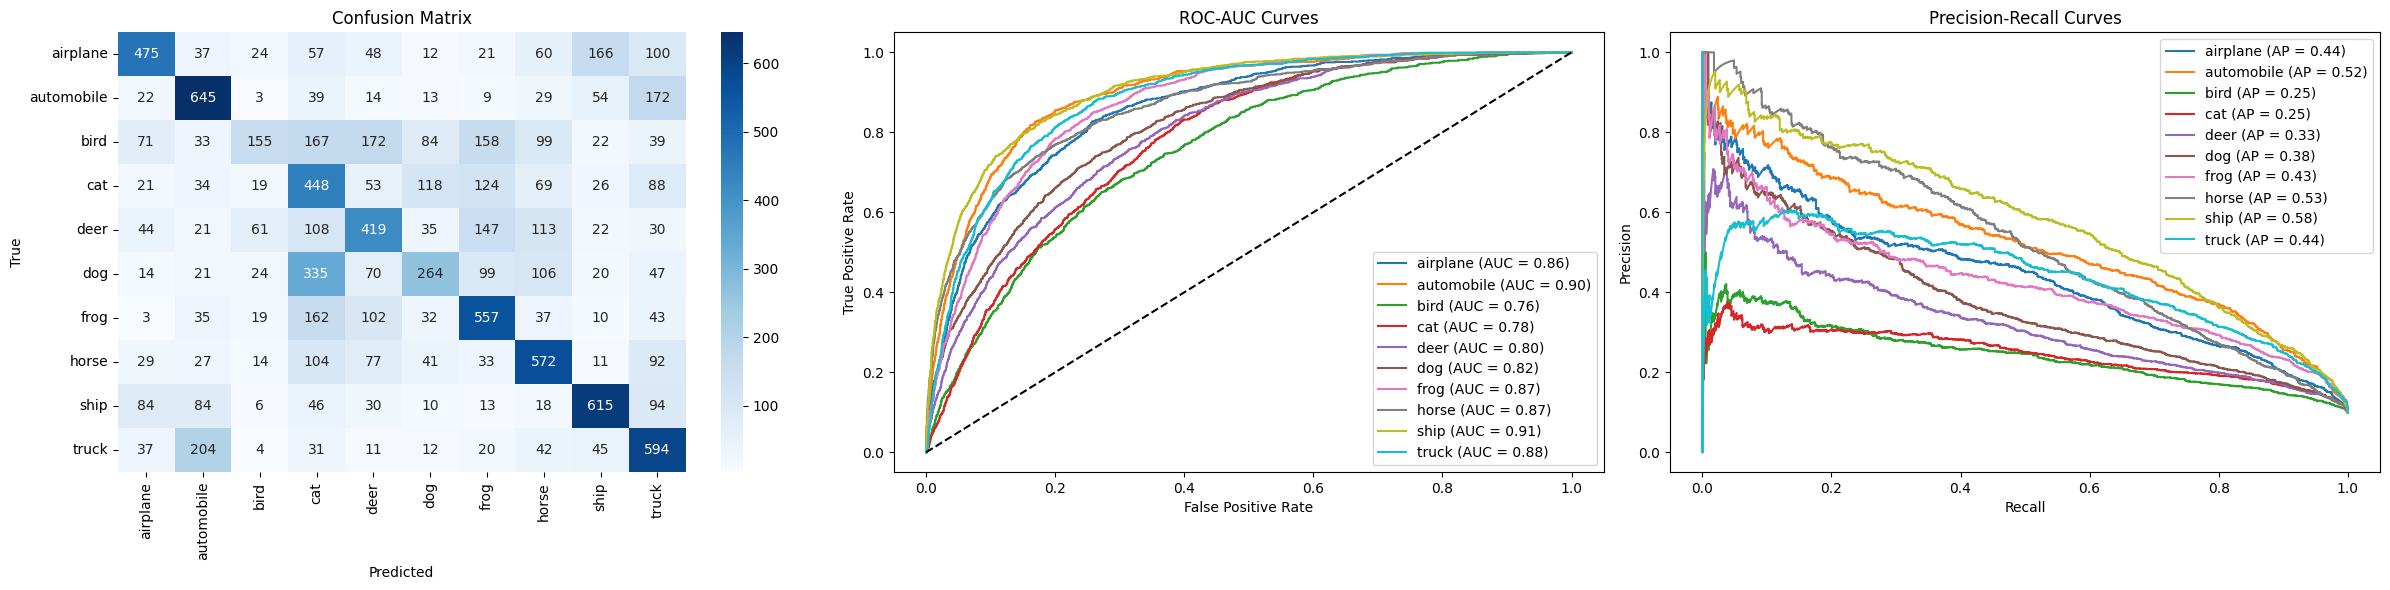

In [133]:
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# ROC-AUC
y_test_bin = label_binarize(y_true_classes, classes=np.arange(10))
fpr = {}
tpr = {}
roc_auc = {}
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Precision-Recall
precision = {}
recall = {}
avg_precision = {}
for i in range(10):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_probs[:, i])
    avg_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_probs[:, i])

fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# 1. Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
            xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title("Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

# 2. ROC-AUC Curves
for i in range(10):
    axes[1].plot(fpr[i], tpr[i], label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")
axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_title("ROC-AUC Curves")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].legend(loc='lower right')

# 3. Precision-Recall Curves
for i in range(10):
    axes[2].plot(recall[i], precision[i], label=f"{class_names[i]} (AP = {avg_precision[i]:.2f})")
axes[2].set_title("Precision-Recall Curves")
axes[2].set_xlabel("Recall")
axes[2].set_ylabel("Precision")
axes[2].legend(loc='upper right')

plt.tight_layout()
#plt.savefig("evaluation_subplots.png")
plt.show()

# Implementing CNN :

In [134]:
# Model :
model_cnn = Sequential([
    Conv2D(32, (3, 3), strides =(1, 1), padding = "valid", activation='relu', input_shape = (32, 32, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10),
])
print (model_cnn.summary())

# Loss and optimiser :
loss_cnn = keras.losses.CategoricalCrossentropy(from_logits=True) # for Softmax function
optim_cnn = keras.optimizers.Adam(learning_rate=0.0009)
metrics_cnn = ['accuracy']

model_cnn.compile(loss=loss_cnn, optimizer=optim_cnn, metrics=metrics_cnn)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_41 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_22 (Flatten)            │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 64)             │       460,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 462,410 (1.76 MB)

 Trainable params: 462,410 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

None


In [135]:
# Training :
batch_size_cnn = 64
epoch_cnn = 10

history_cnn = model_cnn.fit(x_train, y_train, batch_size=batch_size_cnn,
          epochs=epoch_cnn, shuffle = True, verbose = 2, validation_split = 0.2)

Epoch 1/10
625/625 - 5s - 8ms/step - accuracy: 0.4112 - loss: 1.6480 - val_accuracy: 0.5043 - val_loss: 1.4096
Epoch 2/10
625/625 - 2s - 3ms/step - accuracy: 0.5341 - loss: 1.3169 - val_accuracy: 0.5582 - val_loss: 1.2859
Epoch 3/10
625/625 - 3s - 4ms/step - accuracy: 0.5757 - loss: 1.2075 - val_accuracy: 0.5774 - val_loss: 1.2328
Epoch 4/10
625/625 - 3s - 4ms/step - accuracy: 0.6025 - loss: 1.1342 - val_accuracy: 0.5758 - val_loss: 1.2013
Epoch 5/10
625/625 - 2s - 4ms/step - accuracy: 0.6237 - loss: 1.0771 - val_accuracy: 0.6065 - val_loss: 1.1395
Epoch 6/10
625/625 - 3s - 4ms/step - accuracy: 0.6409 - loss: 1.0301 - val_accuracy: 0.5963 - val_loss: 1.1655
Epoch 7/10
625/625 - 3s - 4ms/step - accuracy: 0.6556 - loss: 0.9891 - val_accuracy: 0.6162 - val_loss: 1.1282
Epoch 8/10
625/625 - 3s - 4ms/step - accuracy: 0.6700 - loss: 0.9545 - val_accuracy: 0.6259 - val_loss: 1.0860
Epoch 9/10
625/625 - 2s - 4ms/step - accuracy: 0.6813 - loss: 0.9191 - val_accuracy: 0.6162 - val_loss: 1.1014
E

In [136]:
# Evaluating :
model_cnn.evaluate(x_test, y_test, batch_size = batch_size_cnn, verbose = 2)

157/157 - 1s - 4ms/step - accuracy: 0.6301 - loss: 1.0651


[1.0651154518127441, 0.6301000118255615]

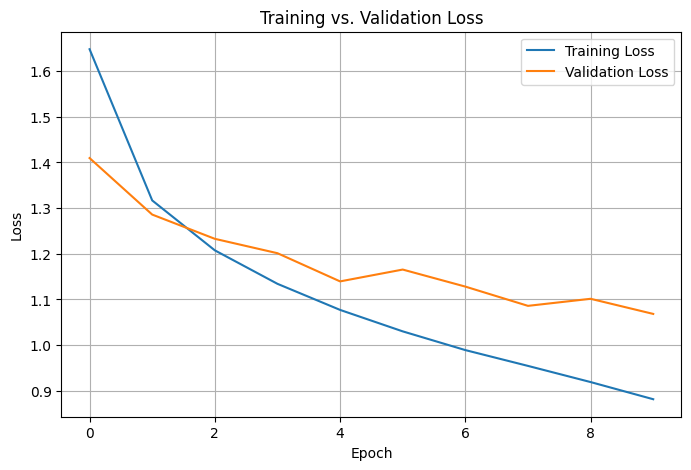

In [137]:
# Extract values
train_loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']

# Plot
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

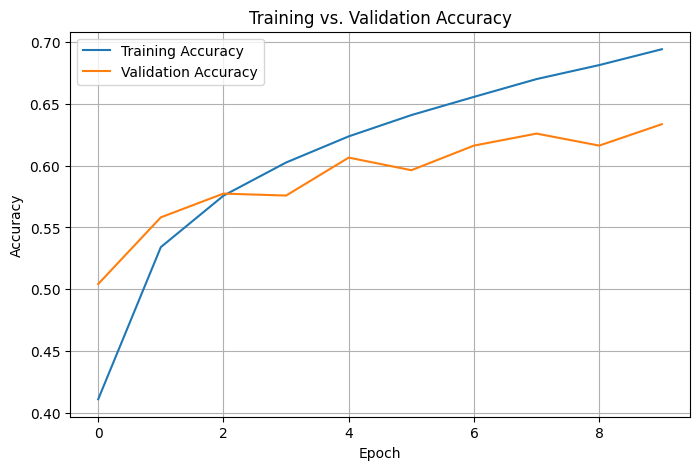

In [138]:
train_acc = history_cnn.history['accuracy']
val_acc = history_cnn.history['val_accuracy']

plt.figure(figsize=(8, 5))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


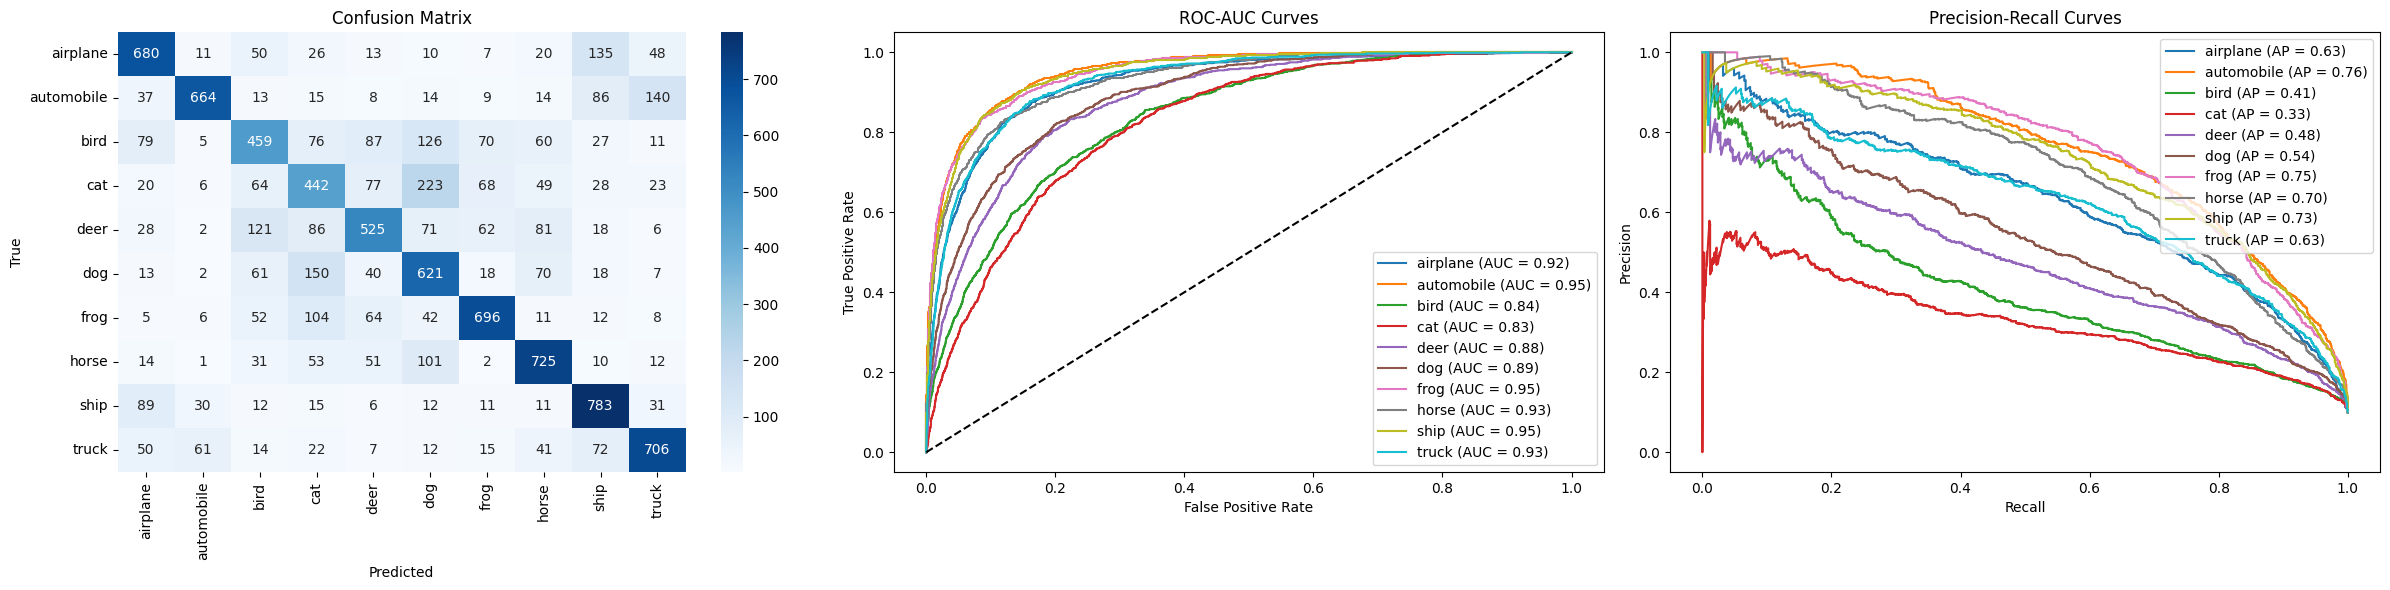

In [139]:
y_pred_probs = model_cnn.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# ROC-AUC
y_test_bin = label_binarize(y_true_classes, classes=np.arange(10))
fpr = {}
tpr = {}
roc_auc = {}
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Precision-Recall
precision = {}
recall = {}
avg_precision = {}
for i in range(10):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_probs[:, i])
    avg_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_probs[:, i])

fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# 1. Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
            xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title("Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

# 2. ROC-AUC Curves
for i in range(10):
    axes[1].plot(fpr[i], tpr[i], label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")
axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_title("ROC-AUC Curves")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].legend(loc='lower right')

# 3. Precision-Recall Curves
for i in range(10):
    axes[2].plot(recall[i], precision[i], label=f"{class_names[i]} (AP = {avg_precision[i]:.2f})")
axes[2].set_title("Precision-Recall Curves")
axes[2].set_xlabel("Recall")
axes[2].set_ylabel("Precision")
axes[2].legend(loc='upper right')

plt.tight_layout()
#plt.savefig("evaluation_subplots.png")
plt.show()

Le Net (Implementing from scratch) :

In [161]:
# LeNet Model :

lenet_model = Sequential([
    Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)),
    AveragePooling2D((2,2)),
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    AveragePooling2D((2,2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10)
])

print (lenet_model.summary())

# Loss and optimiser :
loss_lenet = keras.losses.CategoricalCrossentropy(from_logits=True) # for Softmax function
optim_lenet = keras.optimizers.Adam(learning_rate=0.0008)
metrics_lenet = ['accuracy']

lenet_model.compile(loss=loss_lenet, optimizer=optim_lenet, metrics=metrics_lenet)

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_54 (Conv2D)              │ (None, 28, 28, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_47            │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_48            │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_29 (Flatten)            │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 62,006 (242.21 KB)

 Non-trainable params: 0 (0.00 B)

None


In [162]:
# Training :
batch_size_lenet = 64
epoch_lenet = 10

history_lenet = lenet_model.fit(x_train, y_train, batch_size=batch_size_lenet,
          epochs=epoch_lenet, shuffle = True, verbose = 2, validation_split = 0.2)

Epoch 1/10
625/625 - 5s - 9ms/step - accuracy: 0.3637 - loss: 1.7542 - val_accuracy: 0.4516 - val_loss: 1.5393
Epoch 2/10
625/625 - 3s - 5ms/step - accuracy: 0.4641 - loss: 1.4811 - val_accuracy: 0.4894 - val_loss: 1.4335
Epoch 3/10
625/625 - 2s - 4ms/step - accuracy: 0.5006 - loss: 1.3857 - val_accuracy: 0.5004 - val_loss: 1.3913
Epoch 4/10
625/625 - 2s - 4ms/step - accuracy: 0.5287 - loss: 1.3162 - val_accuracy: 0.5261 - val_loss: 1.3343
Epoch 5/10
625/625 - 3s - 4ms/step - accuracy: 0.5485 - loss: 1.2607 - val_accuracy: 0.5337 - val_loss: 1.3051
Epoch 6/10
625/625 - 2s - 4ms/step - accuracy: 0.5655 - loss: 1.2147 - val_accuracy: 0.5466 - val_loss: 1.2930
Epoch 7/10
625/625 - 2s - 3ms/step - accuracy: 0.5819 - loss: 1.1722 - val_accuracy: 0.5712 - val_loss: 1.2186
Epoch 8/10
625/625 - 3s - 4ms/step - accuracy: 0.5964 - loss: 1.1349 - val_accuracy: 0.5777 - val_loss: 1.2058
Epoch 9/10
625/625 - 3s - 4ms/step - accuracy: 0.6076 - loss: 1.1002 - val_accuracy: 0.5853 - val_loss: 1.1886
E

In [163]:
# Evaluating :
lenet_model.evaluate(x_test, y_test, batch_size = batch_size_lenet, verbose = 2)

157/157 - 0s - 2ms/step - accuracy: 0.5790 - loss: 1.2012


[1.2011996507644653, 0.5789999961853027]

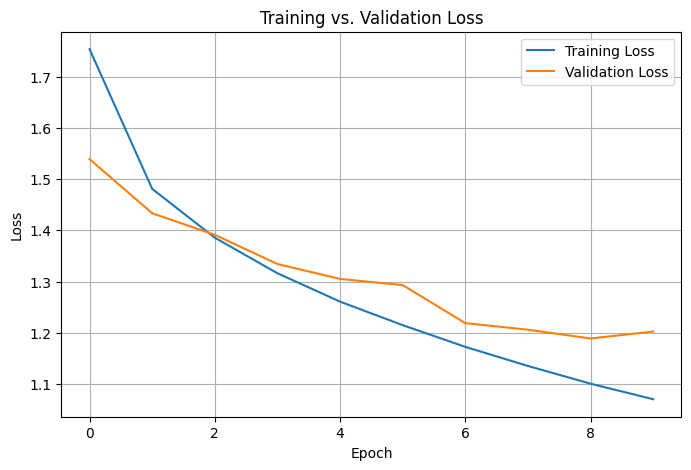

In [164]:
# Extract values
train_loss = history_lenet.history['loss']
val_loss = history_lenet.history['val_loss']

# Plot
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

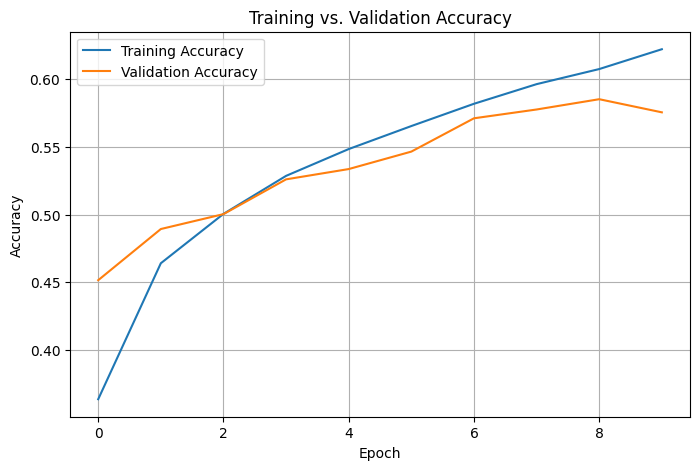

In [165]:
train_acc = history_lenet.history['accuracy']
val_acc = history_lenet.history['val_accuracy']

plt.figure(figsize=(8, 5))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Model Evaluation :

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


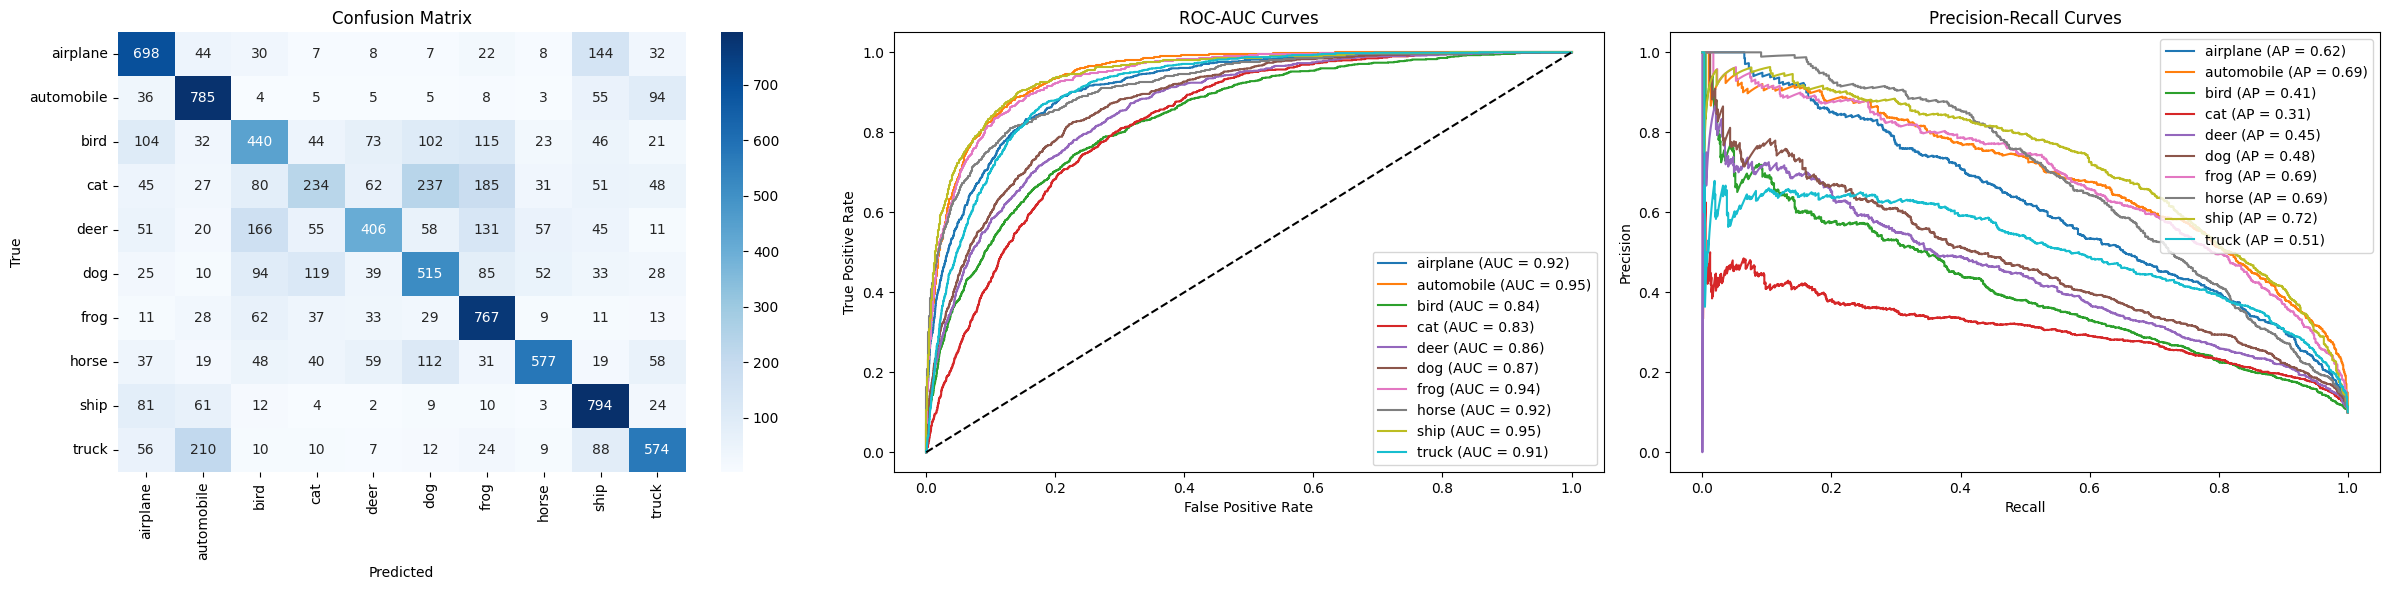

In [166]:
y_pred_probs = lenet_model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# ROC-AUC
y_test_bin = label_binarize(y_true_classes, classes=np.arange(10))
fpr = {}
tpr = {}
roc_auc = {}
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Precision-Recall
precision = {}
recall = {}
avg_precision = {}
for i in range(10):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_probs[:, i])
    avg_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_probs[:, i])

fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# 1. Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
            xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title("Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

# 2. ROC-AUC Curves
for i in range(10):
    axes[1].plot(fpr[i], tpr[i], label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")
axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_title("ROC-AUC Curves")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].legend(loc='lower right')

# 3. Precision-Recall Curves
for i in range(10):
    axes[2].plot(recall[i], precision[i], label=f"{class_names[i]} (AP = {avg_precision[i]:.2f})")
axes[2].set_title("Precision-Recall Curves")
axes[2].set_xlabel("Recall")
axes[2].set_ylabel("Precision")
axes[2].legend(loc='upper right')

plt.tight_layout()
#plt.savefig("evaluation_subplots.png")
plt.show()